In [1]:
# Run a Bicycle Model of a Car
import numpy as np
from math import sin, pi
import matplotlib.pyplot as plt

from scipy import integrate

In [14]:
# Parameters
u0 = 50.0/2.4
g = 9.81
m = 1530.0
WB = 2780.0/1000
a = 1140.0/1000
b = WB-a
Jz = 2732.0
L = 1550.0/1000
h = 500.0/1000
Cyf = 68348.0 # Each Tire
Cyr = 48578.0 # Each Tire
Cxf = 6642/0.04;
Cxr = 4774/0.04;

# Equations of Motion
def eom(t,x):
    vy = x[0]
    wz = x[1]
    
    deltafmag = 2*pi/180
    #deltaf = deltafmag*sin(t)
    if t>1:
        deltaf = deltafmag
    else:
        deltaf=0
        
    deltar = 0
    alphf = deltaf - (vy + a*wz)/u0
    alphr = deltar - (vy - b*wz)/u0
    
    Fyf = 2*Cyf*alphf
    Fyr = 2*Cyr*alphr
    
    dvy = (Fyf + Fyr)/m - wz*u0
    dwz = (a*Fyf-b*Fyr)/Jz
        
    dxdt = [dvy, dwz]
        
    if IS_INTEGRATED is True:
        return dxdt
    else:
        # Extra outputs
        ay = dvy + wz*u0
        
        return [ay,alphf,alphr,deltaf]

# Initial Conditions
vy0 = 0
wz0 = 0
x0 = [vy0,wz0]
tspan = [0,10]

IS_INTEGRATED = True
sol = integrate.solve_ivp(eom,tspan,x0)

# Get Extra Outputs
ay=[]
alphf=[]
alphr=[]
deltaf=[]

IS_INTEGRATED = False
for (t,y0,y1) in zip(sol.t,sol.y[0],sol.y[1]):
    extra = eom(t,[y0,y1])
    ay.append(extra[0])
    alphf.append(extra[1])
    alphr.append(extra[2])
    deltaf.append(extra[3])

<Figure size 432x288 with 0 Axes>

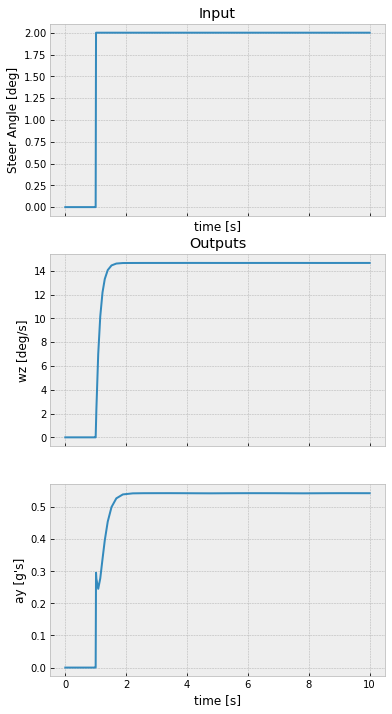

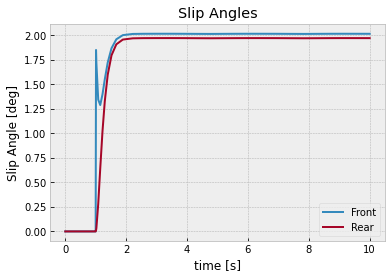

In [15]:
# Plots
plt.style.use('bmh')

f1 = plt.figure('Figure 1')
f1, ax = plt.subplots(3,1,sharex=True,figsize=(6,12))
ax[0].set_title('Input')
ax[0].plot(sol.t,[180/pi*x for x in deltaf])
ax[0].set_ylabel('Steer Angle [deg]')
ax[0].set_xlabel('time [s]')
ax[0].set_title('Input')
ax[1].set_title('Outputs')
ax[1].plot(sol.t,[180/pi*x for x in sol.y[1]])
ax[1].set_ylabel('wz [deg/s]')
ax[0].set_xlabel('time [s]')
ax[2].plot(sol.t,[x/g for x in ay])
ax[2].set_xlabel('time [s]')
ax[2].set_ylabel('ay [g\'s]')

f2 = plt.figure('Figure 2')
plt.plot(sol.t,[180/pi*x for x in alphf])
plt.plot(sol.t,[180/pi*x for x in alphr])
plt.xlabel('time [s]')
plt.ylabel('Slip Angle [deg]')
plt.title('Slip Angles')
plt.legend(['Front','Rear'])